In [1]:
import tensorflow as tf
import pandas as ad
import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import cv2


In [17]:
unet = tf.keras.models.load_model('unet.h5', compile=False)
deeplab = tf.keras.models.load_model('deeplabv3plus.h5', compile=False)
pspnet = tf.keras.models.load_model('pspnet.h5', compile=False)
fcn =  tf.keras.models.load_model('fcn.h5', compile=False)

1/1 [==============================] - 0s 21ms/step


C:\Users\gamer\AppData\Local\Temp\ipykernel_7848\1456453690.py:59: UserWarning: No contour levels were found within the data range.
  ax5.contour(pred4.reshape((512, 512)), 2,linewidths=1, colors='r' )


1/1 [==============================] - 0s 21ms/step


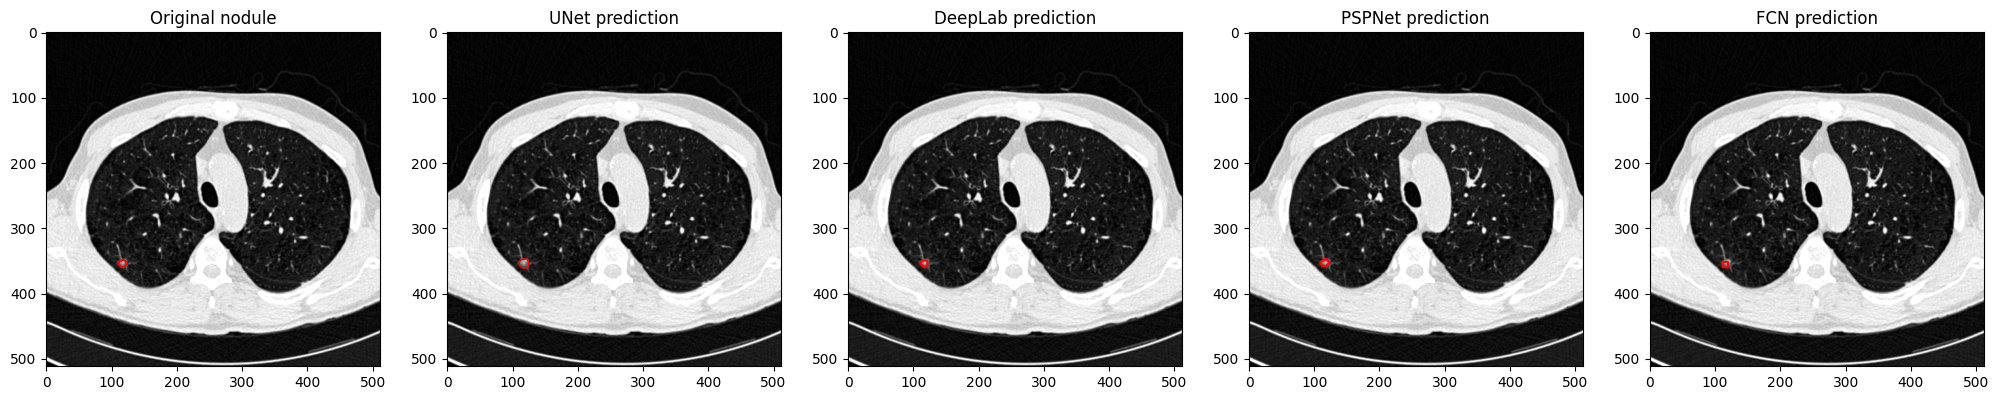

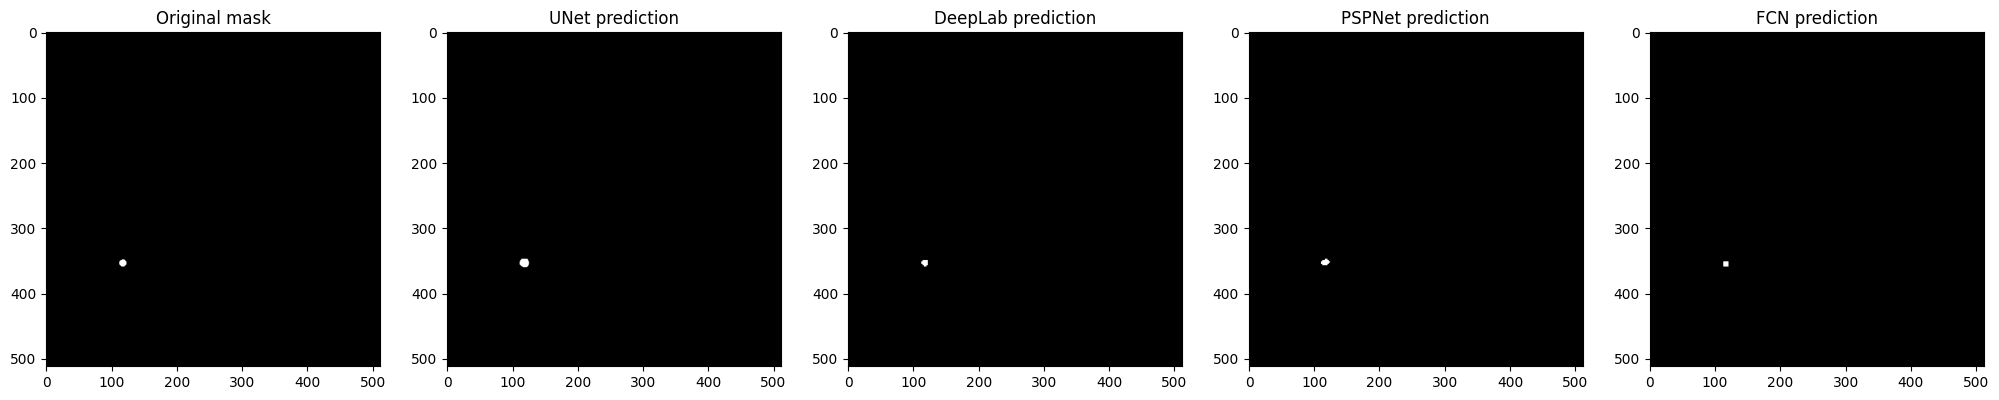

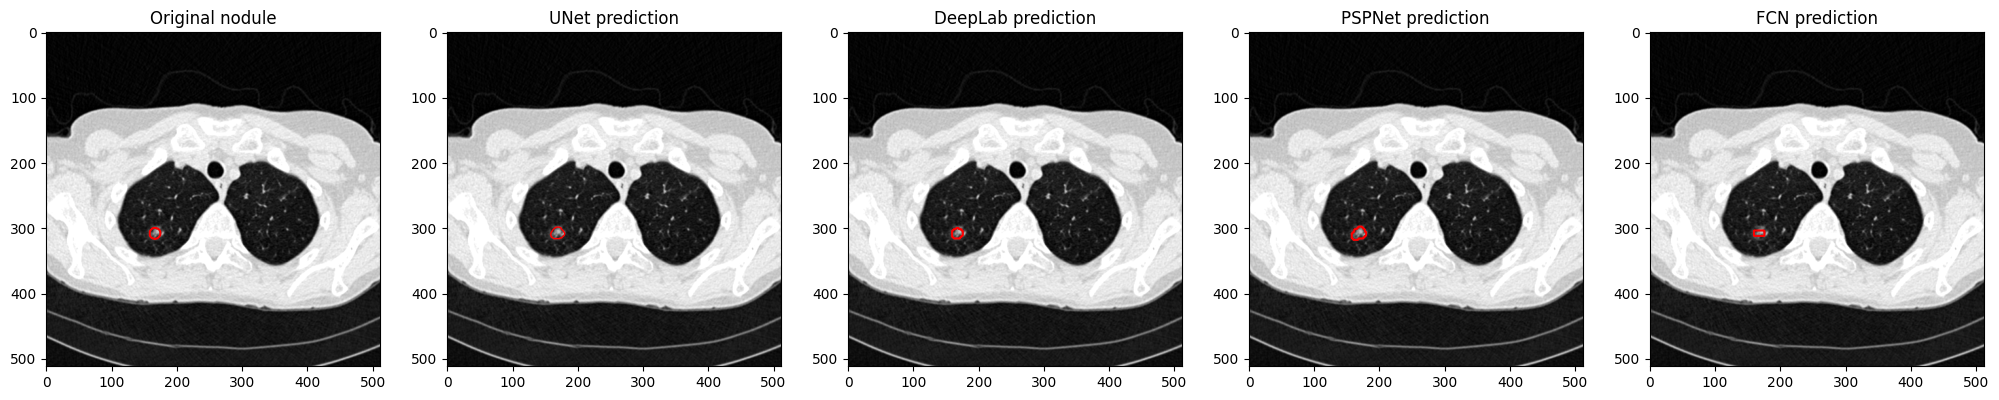

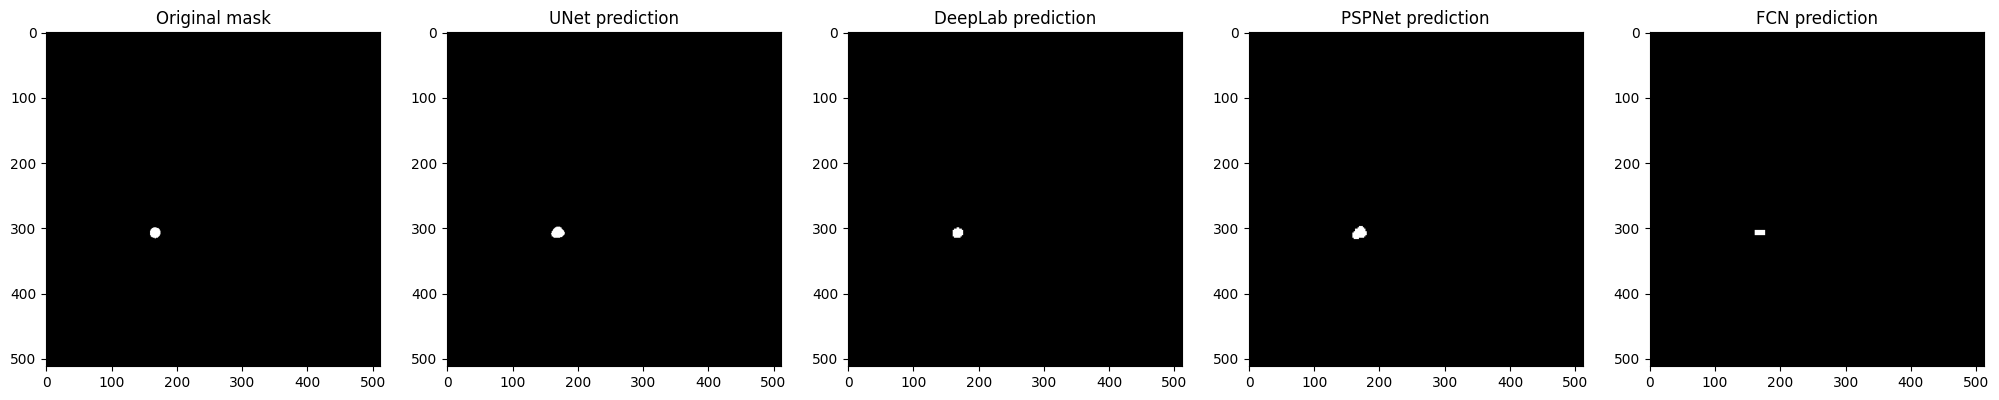

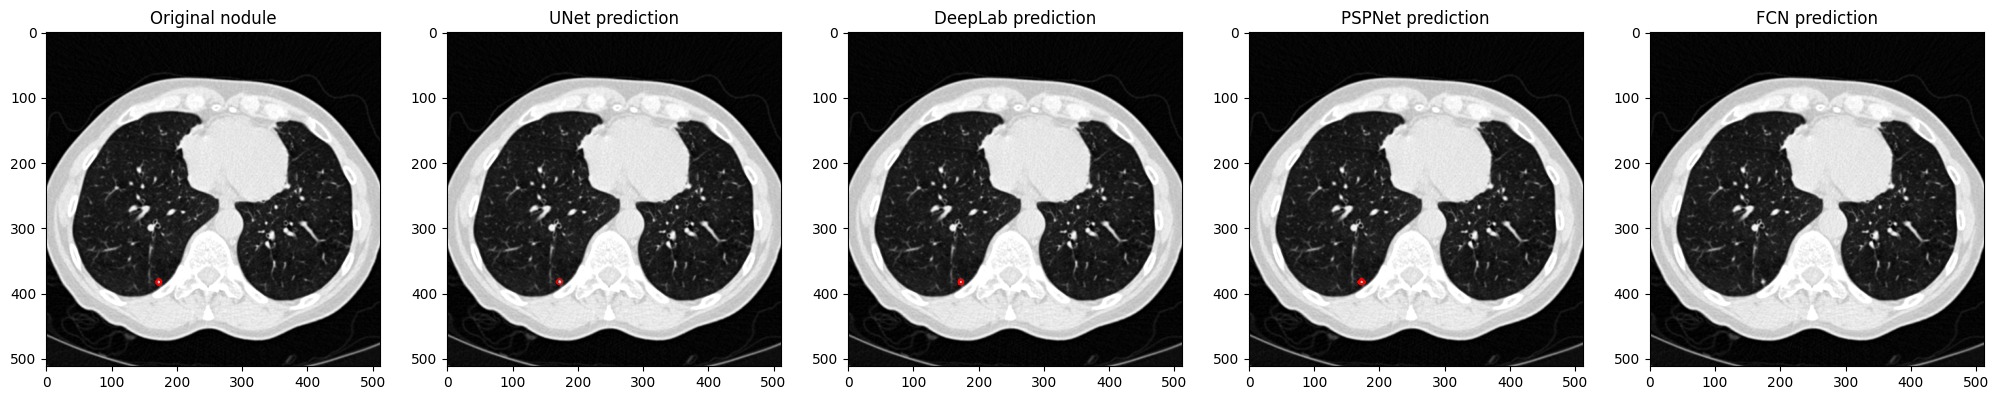

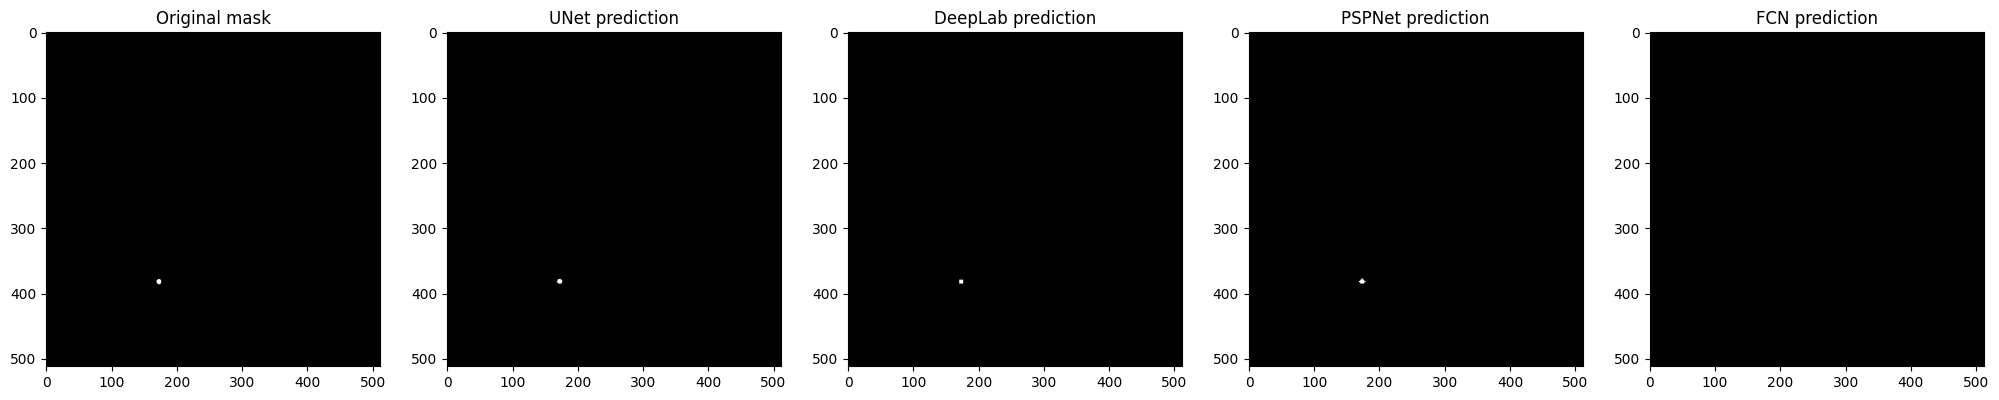

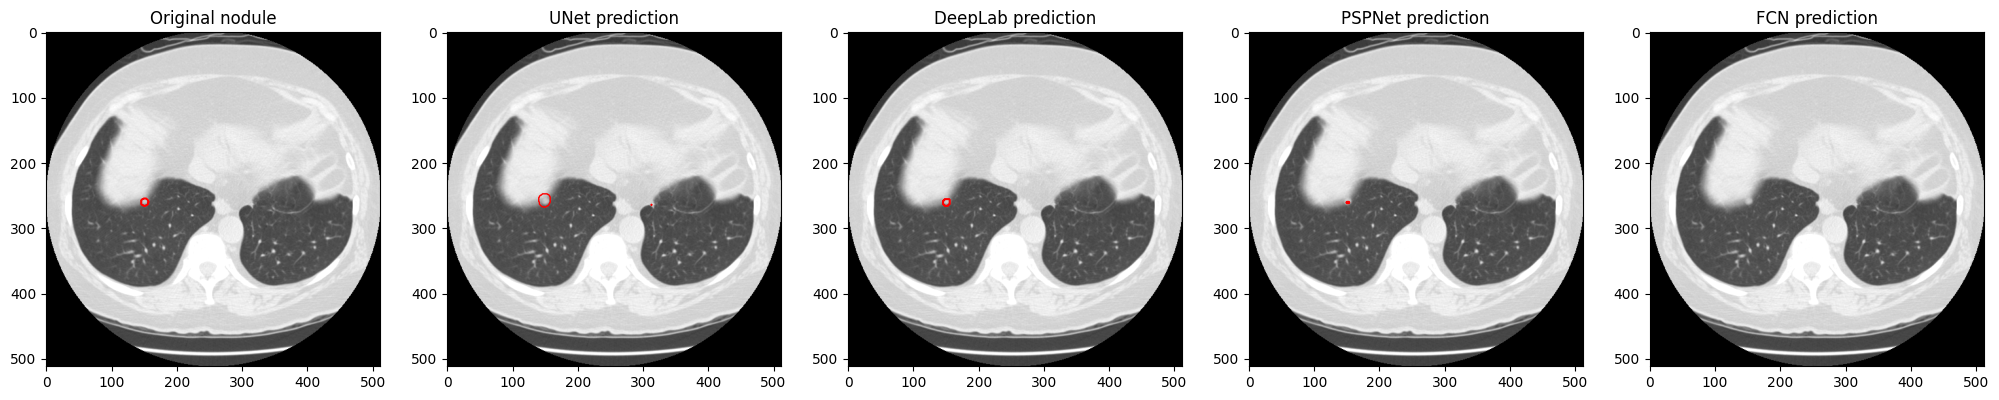

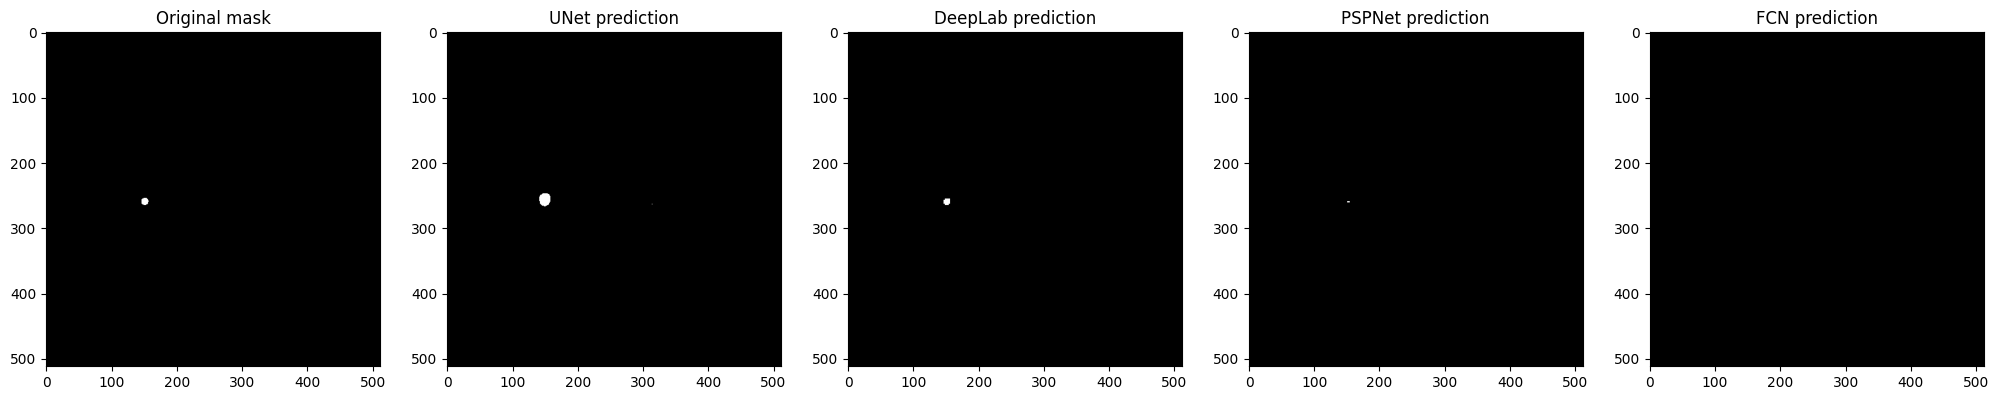

In [20]:


image_dir = "D:/fin_de_etude/data/dataset_2d/nodule/"
mask_dir = "D:/fin_de_etude/data/nodule_mask/nodule/"

# Load the list of image files (assuming you want the first 4)

# List all files in the directory
all_files = os.listdir(image_dir)

# Filter files with the ".mhd" extension and select the first four
mhd_files = [file for file in all_files if file.endswith(".mhd")]
selected_files = mhd_files[:4]

for file in selected_files:
    # Load the image and mask using SimpleITK
    img = sitk.ReadImage(os.path.join(image_dir, file))
    mask = sitk.ReadImage(os.path.join(mask_dir, file))

    # Convert SimpleITK images to NumPy arrays
    img = sitk.GetArrayFromImage(img)
    mask = sitk.GetArrayFromImage(mask)

    # Normalize the image to the range [0, 1]
    img = img / 255

    # Predict using your models (assuming unet, deeplab, pspnet are defined)
    pred1 = unet.predict(img.reshape(1, 512, 512, 1))
    pred2 = deeplab.predict(img.reshape(1, 512, 512, 1))
    pred3 = pspnet.predict(img.reshape(1, 512, 512, 1))
    pred4 = fcn.predict(img.reshape(1, 512, 512, 1))
    # Binarize the predictions
    pred1 = np.where(pred1 > 0.5, 1, 0)
    pred2 = np.where(pred2 > 0.5, 1, 0)
    pred3 = np.where(pred3 > 0.5, 1, 0)
    pred4 = np.where(pred4 > 0.5, 1, 0)
    # Create subplots for visualization
    fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(ncols=5, figsize=(25, 25))
    ax1.imshow(img, cmap="gray")
    ax1.contour(mask, 2, colors='r', linewidths=1)
    ax1.set_title('Original nodule')

    ax2.imshow(img, cmap='gray')
    ax2.contour(pred1.reshape((512, 512)), levels=[0.2],linewidths=1, colors='r')
    ax2.set_title('UNet prediction')

    ax3.imshow(img, cmap='gray')
    ax3.contour(pred2.reshape((512, 512)), 2, colors='r', linewidths=1)
    ax3.set_title('DeepLab prediction')

    ax4.imshow(img, cmap='gray')
    ax4.contour(pred3.reshape((512, 512)), 2,linewidths=1, colors='r' )
    ax4.set_title('PSPNet prediction')
    ax5.imshow(img, cmap='gray')
    ax5.contour(pred4.reshape((512, 512)), 2,linewidths=1, colors='r' )
    ax5.set_title('FCN prediction')
    fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(ncols=5, figsize=(25, 25))
    ax1.imshow(mask, cmap="gray")
    ax1.set_title('Original mask')
    ax2.imshow(pred1.reshape((512, 512)), cmap='gray')
   
    ax2.set_title('UNet prediction')

    ax3.imshow(pred2.reshape((512, 512)), cmap='gray')
   
    ax3.set_title('DeepLab prediction')

    ax4.imshow(pred3.reshape((512, 512)), cmap='gray')
    ax4.set_title('PSPNet prediction')
    ax5.imshow(pred4.reshape((512, 512)), cmap='gray')
    ax5.set_title('FCN prediction')

plt.show()



In [11]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])